**Hello there!** This is a first version of *KatKit*, a toolkit for modeling humanistic concepts in Python. This Jupyter Notebook is an accompaniment to a long paper presented at DH2024 and a lightning talk at a pre-conference workshop organized by the ADHO Special Interest Group in Digital Literary Stylistics. For more information see below. For citation please refer to the DH2024 long paper.

<br>

> **Gerstorfer, Dominik, Häußler, Julian and Eveyin Gius.** 2024: "Reinventing (Literary) Operationalization. Introducing KatKit, a toolkit for modeling humanistic concepts in Python." In *DH2024 Book of Abstracts*. Washington, D.C.: Zenodo. LINK.

> **Häußler, Julian, Gerstorfer, Dominik and Evelyn Gius.** 2024: "Using Jupyter Notebooks as Research and Presentation Environment – Experiences from the Project KatKit." Lightning Talk at the DH2024 Workshop – Computational Literary Studies: How To Do Research Responsibly, Washington, D.C., USA. https://doi.org/10.58079/122j8.

```
__/\\\________/\\\_______________________________/\\\________/\\\_____________________        
 _\/\\\_____/\\\//_______________________________\/\\\_____/\\\//______________________       
  _\/\\\__/\\\//________________________/\\\______\/\\\__/\\\//______/\\\_____/\\\______      
   _\/\\\\\\//\\\______/\\\\\\\\\_____/\\\\\\\\\\\_\/\\\\\\//\\\_____\///___/\\\\\\\\\\\_     
    _\/\\\//_\//\\\____\////////\\\___\////\\\////__\/\\\//_\//\\\_____/\\\_\////\\\////__    
     _\/\\\____\//\\\_____/\\\\\\\\\\_____\/\\\______\/\\\____\//\\\___\/\\\____\/\\\______   
      _\/\\\_____\//\\\___/\\\/////\\\_____\/\\\_/\\__\/\\\_____\//\\\__\/\\\____\/\\\_/\\__  
       _\/\\\______\//\\\_\//\\\\\\\\/\\____\//\\\\\___\/\\\______\//\\\_\/\\\____\//\\\\\___
        _\///________\///___\////////\//______\/////____\///________\///__\///______\/////____

```

<p align="center"> Categories for the Digital Humanities<p>
<p align="center"> A Toolkit for Modeling Humanistic Concepts in Python </p>

<br>

<p align="center"> fortext lab </p>
<p align="center"> 2021-24 </p>


**Overview**
<ol>
  <li> Introductory Remarks </li>
  <li> Conceptualizing with Ologs </li>
  <li> Concepts as Orders </li>
</ol>

# 1️⃣ Introductory remarks


This Jupyter Notebook is part of the *KatKit* (category toolkit) project, which deals with (literary) operationalization based on applied category theory. With this Jupyter Notebook, we want to provide a tool for thinking that aids (literary) operationalization by (1) teaching how to conceptualize using category theory and (2) allowing formalization using our methodology directly in the Jupyter Notebook. Furthermore, we want researchers to (3) be able to use all functionalities without prior programming experience.

In this Notebook devices from applied category theory are used to  model research objects. One device are for example Ologs (ontology logs) that formalize modeling in a flowchart format (contrived by Spivak 2014). In a similar fashion, we also offer the possibility of visualizing concepts in a Hasse(-style) diagram.

Our usage of Jupyter Notebooks aims at enabling users to perform the operationalization of their concepts, to create  visualizations as output, to document the research process and to make it easily shareable with other users, even without coding expertise.

In the current version, all building blocks of both Ologs and concepts are separate objects of their respective classes. With this structure we hope to enable the creation of database schemas and data manipulation in the future.

**How to use this Jupter Notebook**:

*   Run the setup cells.
*   You can simply view the examples or start by modifying them.
*   Or you can create your own Ologs or concepts in the empty cells.
*   Visualization is done using the `visualize_dot`function. It requires a string in the DOT language, which can be generated for both Ologs and concepts using the `get_dot()` function. You can also simply print out the DOT string and re-use it with other tools, e.g. [GraphvizOnline](https://dreampuf.github.io/GraphvizOnline). With GraphvizOnline can download the visualizations as png- or svg-file.

# 2️⃣  Conceptualizing with Ologs

# 🛠️ Setup – Run once

In [ ]:
# @title Install packages (if necessary)
# @markdown Run this block in case pydot has not yet been installed in this environment.

!pip install pydot

In [ ]:
# @title Imports
# @markdown This block imports the necessary packages.
import pydot
from IPython.display import Image, display

In [ ]:
# @title Olog
# @markdown This block creates the type, aspect and olog classes.

class Type:
  """A class to create a type object"""

  def __init__(self, unique_var, descriptor, compound_form = None, compounds = []):
    self.unique_var = unique_var
    self.descriptor = descriptor
    self.compound_form = compound_form
    self.compounds = compounds

    # check if compounds conform with compound form
    if compound_form != None:
      if compound_form == 'pair':
        if len(compounds) < 2:
          raise CompoundException("not enough compounds for compound form "+ compound_form)
        elif len(compounds) > 2:
          raise CompoundException("too many compounds for compound form "+ compound_form)
      if compound_form == 'triple':
        if len(compounds) < 3:
          raise CompoundException("not enough compounds for compound form "+ compound_form)
        elif len(compounds) > 3:
          raise CompoundException("too many compounds for compound form "+ compound_form)
      if compound_form == 'one_component':
        if len(compounds) < 1:
          raise CompoundException("not enough compounds for compound form "+ compound_form)
        elif len(compounds) > 1:
          raise CompoundException("too many compounds for compound form "+ compound_form)
      if compound_form == 'two_components':
        if len(compounds) < 2:
          raise CompoundException("not enough compounds for compound form "+ compound_form)
        elif len(compounds) > 2:
          raise CompoundException("too many compounds for compound form "+ compound_form)

  def __str__(self):
    return f'{self.descriptor} {self.unique_var}'

  def get_dot(self):
    viz = pydot.Dot(graph_type='digraph')

    if self.compound_form == None:
      viz.add_node(pydot.Node('n',label=f'{self.descriptor} {self.unique_var}', shape='box'))
    elif self.compound_form == 'pair':
      c1 = self.compounds[0]
      c2 = self.compounds[1]
      viz.add_node(pydot.Node('n',label=f'a pair ({c1[0]},{c2[0]})\nwhere {c1[0]} is {c1[1]}\nand {c2[0]} is {c2[1]}', shape='box'))
    elif self.compound_form == 'triple':
      c1 = self.compounds[0]
      c2 = self.compounds[1]
      c3 = self.compounds[2]
      viz.add_node(pydot.Node('n',label=f'a triple ({c1[0]},{c2[0]},{c3[0]})\nwhere {c1[0]} is {c1[1]},\n {c2[0]} is {c2[1]},\n and {c3[0]} is {c3[1]}', shape='box'))
    elif self.compound_form == 'one_component':
      c1 = self.compounds[0]
      viz.add_node(pydot.Node('n',label=f'{self.descriptor} {self.unique_var}\nwith {c1[1]} {c1[0]}', shape='box'))
    elif self.compound_form == 'two_components':
      c1 = self.compounds[0]
      c2 = self.compounds[1]
      viz.add_node(pydot.Node('n',label=f'{self.descriptor} {self.unique_var}\nwith {c1[1]} {c1[0]}\nand {c2[1]} {c1[0]}', shape='box'))

    viz_as_dot = viz.to_string()
    return viz_as_dot

  def partial_dot(self):
    viz_as_dot = self.get_dot()
    return viz_as_dot[14:-3]

class CompoundException(Exception):
  pass

class Aspect:
  """A class to create a type object"""

  def __init__(self, varDomain, varCodomain, descriptor):
    self.varDomain = varDomain
    self.varCodomain = varCodomain
    self.descriptor = descriptor

  def __str__(self):
    return f'{self.varDomain} {self.descriptor} {self.varCodomain}'

  def get_dot(self):
    viz = pydot.Dot(graph_type='digraph')
    viz.add_edge(pydot.Edge(self.varDomain, self.varCodomain, label=self.descriptor))
    viz_as_dot = viz.to_string()
    return viz_as_dot

  def partial_dot(self):
    viz_as_dot = self.get_dot()
    return viz_as_dot[12:-3]

class Olog:
  """A class to create an olog object"""

  def __init__(self):
    self.typeDict={}
    self.aspectDict={}

  def addType(self, unique_var=None, descriptor=None, compound_form=None, compounds=None):
    if compound_form==None and compounds==None:
      newType = Type(unique_var, descriptor, compound_form=None, compounds={})
      self.typeDict[newType.unique_var] = newType
    else:
      newType = Type(unique_var, descriptor, compound_form, compounds)
      self.typeDict[newType.unique_var] = newType

  def addAspect(self,varDomain, varCodomain, descriptor):
    # check if aspect is already in olog
    if (varDomain,varCodomain) in self.aspectDict:
      raise ValueError("aspect already in olog")
    else:
      # check if matching types exist
      if varDomain in self.typeDict and varCodomain in self.typeDict:
        newAspect = Aspect(varDomain, varCodomain, descriptor)
        self.aspectDict[(newAspect.varDomain,newAspect.varCodomain)] = newAspect
      else:
        raise ValueError("no matching types")

  def get_dot(self):
    empty_viz = pydot.Dot('viz',graph_type='digraph', dpi = 300, rankdir='LR')
    empty_viz_as_dot = empty_viz.to_string()
    viz = empty_viz_as_dot[:-2]

    for key in self.typeDict:
      viz = viz+key+' '+self.typeDict[key].partial_dot()+'\n'

    for key in self.aspectDict:
      viz = viz+self.aspectDict[key].partial_dot()+'\n'
    viz = viz[:-2]
    viz = viz+'\n}\n'
    return viz



In [ ]:
# @title Visualization
# @markdown This block creates a visualization function. If necessary, change width and height.

def visualize_dot(str):
  graph = pydot.graph_from_dot_data(str)
  plt = Image(graph[0].create_png(), width = 700, height = 100)
  display(plt)

#🎯 Example


An Olog is made up of`types` (*boxes*) and `aspects` (*arrows*). To create an Olog you first initialize an empty olog object. Then you add as many `types` and `aspects` as you like. A `type` requires a unique variable and a description. An `aspect` requires the variable of a domain (*starting point*) and the variable of a codomain (*end point*) as well as a description.

```
o = Olog()
o.addType('VARIABLE','DESCRIPTION')
o.addAspect('VARIABLE DOMAIN', 'VARIABLE CODOMAIN', 'DESCRIPTION')
```



Visualizations are created using the DOT language. Besides visualizing your Olog in Jupyter Notebook you can acess the Olog as a DOT string for processing using other tools.

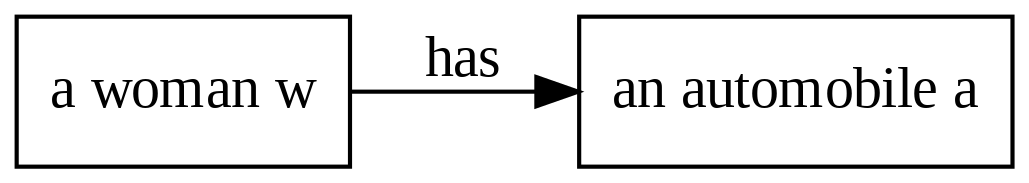

In [ ]:
o = Olog()
o.addType('w','a woman')
o.addType('a','an automobile')
o.addAspect('w','a','has')
visualize_dot(o.get_dot())

In [ ]:
print(o.get_dot())

digraph viz {
dpi=300;
rankdir=LR;
w [label="a woman w", shape=box];
a [label="an automobile a", shape=box];
w -> a  [label=has]
}



Ologs also allow `types` with a compound structure, e.g. combining the woman *w* and the automobile *a* into a single type which describes "a woman w, who has an automobile a." KatKit allows the following compounds structures:

*   `pair`
*   `triple`
*   `one_component`
*   `two_components`

To create a `type` with compound structure, the `type` class requires, besides the unique variable and the description, a specification of the compound form and the compounds as lists.

```
o.addType('p','a pair',compound_form='pair', compounds=[['w','a woman'],['a','an automobile'])
o.addType('t','a triple',compound_form='triple', compounds=[['j','a journal'],['p','a paper'],['a','an author'])
o.addType('w','a woman',compound_form='one_component', compounds=[['a','an automobile']])
o.addType('w','a woman',compound_form='two_components', compounds=[['a','an automobile'],['g','a garage'])

```

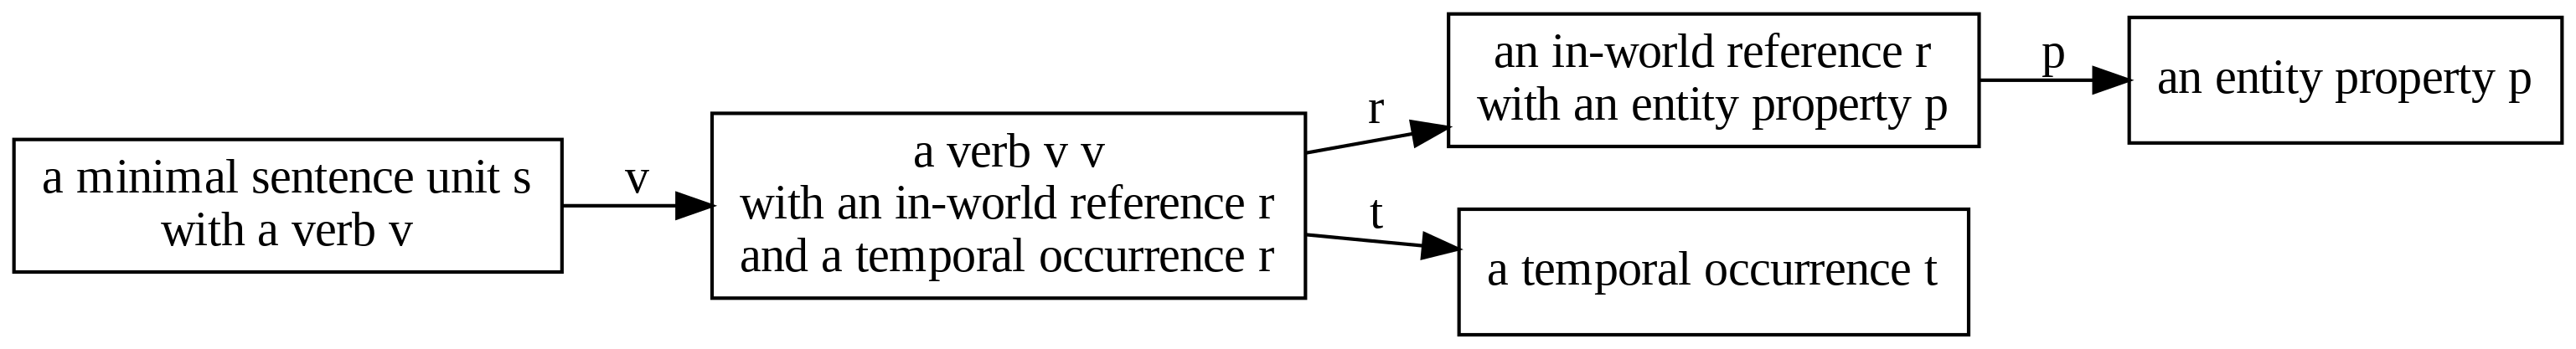

In [ ]:
e = Olog()
e.addType('s','a minimal sentence unit',compound_form='one_component', compounds=[['v','a verb']])
e.addType('v','a verb v',compound_form='two_components', compounds=[['r','an in-world reference'],['t','a temporal occurrence']])
e.addType('r','an in-world reference',compound_form='one_component', compounds=[['p','an entity property']])
e.addType('p','an entity property')
e.addType('t','a temporal occurrence')
e.addAspect('s','v','v')
e.addAspect('v','r','r')
e.addAspect('v','t','t')
e.addAspect('r','p','p')
visualize_dot(e.get_dot())

For more information on Ologs, see Spivak 2014.

# 🖌️ Try it out!

You can add new cells using the `+ Code` button in the top left corner.

# 3️⃣  Concepts as Orders

# 🛠️ Setup – Run once

In [ ]:
# @title Concepts
# @markdown This block creates the node, edge and concept classes.


class Node:
  """A class to create a node object"""

  def __init__(self, descriptor):
    self.descriptor = descriptor

  def get_dot(self):
    viz = pydot.Dot(graph_type='graph')
    viz.add_node(pydot.Node(self.descriptor,label=f'"{self.descriptor}"',shape='plain'))
    viz_as_dot = viz.to_string()
    return viz_as_dot

  def partial_dot(self):
    viz_as_dot = self.get_dot()
    return viz_as_dot[10:-3]

class Edge:
  """A class to create an edge object"""

  def __init__(self, start, end):
    self.start = start
    self.end = end

  def get_dot(self):
    viz = pydot.Dot(graph_type='graph')
    viz.add_edge(pydot.Edge(self.start, self.end, dir='forward'))
    viz_as_dot = viz.to_string()
    return viz_as_dot

  def partial_dot(self):
    viz_as_dot = self.get_dot()
    return viz_as_dot[10:-3]

class Concept:
  """A class to create a concept object"""

  def __init__(self, concept_form=str, nodes_full = list, edges_full = list, nodes_selection=list, edges_selection=list):
    self.concept_form = concept_form
    self.nodes_full = []
    self.edges_full = []
    self.nodes_selection = [None]*8
    self.edges_selection = [None]*12

    if self.concept_form == 'triples':
      # nodes
      self.nodes_full.append(Node('___'))
      self.nodes_full.append(Node('x__'))
      self.nodes_full.append(Node('_y_'))
      self.nodes_full.append(Node('__z'))
      self.nodes_full.append(Node('xy_'))
      self.nodes_full.append(Node('x_z'))
      self.nodes_full.append(Node('_yz'))
      self.nodes_full.append(Node('xyz'))
      # edges
      self.edges_full.append(Edge('___','x__'))
      self.edges_full.append(Edge('___','_y_'))
      self.edges_full.append(Edge('___','__z'))
      self.edges_full.append(Edge('x__','xy_'))
      self.edges_full.append(Edge('x__','x_z'))
      self.edges_full.append(Edge('_y_','xy_'))
      self.edges_full.append(Edge('_y_','_yz'))
      self.edges_full.append(Edge('__z','x_z'))
      self.edges_full.append(Edge('__z','_yz'))
      self.edges_full.append(Edge('xy_','xyz'))
      self.edges_full.append(Edge('x_z','xyz'))
      self.edges_full.append(Edge('_yz','xyz'))
    else:
        raise ConceptException("concept form not applicable")

  def addNode(self, new_node=Node):
    #___
    if new_node.descriptor == '___':
          self.nodes_selection[0] = new_node
    #x__
    elif new_node.descriptor[0].isalnum() and new_node.descriptor[1:3] == '__':
          self.nodes_selection[1] = new_node
          if self.edges_selection[0] == None and self.nodes_selection[0] != None:
              self.edges_selection[0] = Edge(self.nodes_selection[0].descriptor,new_node.descriptor)
    #_y_
    elif new_node.descriptor[0] == '_' and new_node.descriptor[1].isalnum() and new_node.descriptor[2] == '_':
          self.nodes_selection[2] = new_node
          if self.edges_selection[1] == None: #and self.nodes_selection[0] != None:
              self.edges_selection[1] = Edge(self.nodes_selection[0].descriptor,new_node.descriptor)
    #__z
    elif new_node.descriptor[0:2] == '__' and new_node.descriptor[2].isalnum():
          self.nodes_selection[3] = new_node
          if self.edges_selection[2] == None and self. nodes_selection[0] != None:
              self.edges_selection[2] = Edge(self.nodes_selection[0].descriptor,new_node.descriptor)
    #xy_
    elif new_node.descriptor[0:2].isalnum() and new_node.descriptor[2] == '_':
          self.nodes_selection[4] = new_node
          if self.edges_selection[3] == None and self.nodes_selection[1] != None:
              self.edges_selection[3] = Edge(self.nodes_selection[1].descriptor,new_node.descriptor)
          if self.edges_selection[5] == None and self.nodes_selection[2] != None:
              self.edges_selection[5] = Edge(self.nodes_selection[2].descriptor,new_node.descriptor)
    #x_z
    elif new_node.descriptor[0].isalnum() and new_node.descriptor[1] == '_' and new_node.descriptor[2].isalnum():
          self.nodes_selection[5] = new_node
          if self.edges_selection[4] == None and self.nodes_selection[1] != None:
              self.edges_selection[4] = Edge(self.nodes_selection[1].descriptor,new_node.descriptor)
          if self.edges_selection[7] == None and self.nodes_selection[3] != None:
              self.edges_selection[7] = Edge(self.nodes_selection[3].descriptor,new_node.descriptor)
    #_yz
    elif new_node.descriptor[0] == '_' and new_node.descriptor[1:2].isalnum():
          self.nodes_selection[6] = new_node
          if self.edges_selection[6] == None and self.nodes_selection[2] != None:
              self.edges_selection[6] = Edge(self.nodes_selection[2].descriptor,new_node.descriptor)
          if self.edges_selection[8] == None and self.nodes_selection[3] != None:
              self.edges_selection[8] = Edge(self.nodes_selection[3].descriptor,new_node.descriptor)
    #xyz
    elif new_node.descriptor.isalnum():
          self.nodes_selection[7] = new_node
          if self.edges_selection[9] == None and self.nodes_selection[4] != None:
              self.edges_selection[9] = Edge(self.nodes_selection[4].descriptor,new_node.descriptor)
          if self.edges_selection[10] == None and self.nodes_selection[5] != None:
              self.edges_selection[10] = Edge(self.nodes_selection[5].descriptor,new_node.descriptor)
          if self.edges_selection[11] == None and self.nodes_selection[6] != None:
              self.edges_selection[11] = Edge(self.nodes_selection[6].descriptor,new_node.descriptor)

  def autoAddNodes(self, top_node=[str,str,str]):
    x = top_node[0]
    y = top_node[1]
    z = top_node[2]

    # nodes
    self.nodes_selection[0] == Node('___')
    self.nodes_selection[1] == Node(x+'__')
    self.nodes_selection[2] == Node('_'+y+'_')
    self.nodes_selection[3] == Node('__'+z)
    self.nodes_selection[4] == Node(x+y+'_')
    self.nodes_selection[5] == Node(x+'_'+z)
    self.nodes_selection[6] == Node('_'+y+z)
    self.nodes_selection[7] == Node(x+y+z)
    # edges
    self.edges_selection[0] = Edge('___',x+'__')
    self.edges_selection[1] = Edge('___','_'+y+'_')
    self.edges_selection[2] = Edge('___','__'+z)
    self.edges_selection[3] = Edge(x+'__',x+y+'_')
    self.edges_selection[4] = Edge(x+'__',x+'_'+z)
    self.edges_selection[5] = Edge('_'+y+'_',x+y+'_')
    self.edges_selection[6] = Edge('_'+y+'_','_'+y+z)
    self.edges_selection[7] = Edge('__'+z,x+'_'+z)
    self.edges_selection[8] = Edge('__'+z,'_'+y+z)
    self.edges_selection[9] = Edge(x+y+'_',x+y+z)
    self.edges_selection[10] = Edge(x+'_'+z,x+y+z)
    self.edges_selection[11] = Edge('_'+y+z,x+y+z)


  def get_dot(self):
    empty_viz = pydot.Dot('viz',graph_type='graph', dpi = 300, rankdir='BT')
    empty_viz_as_dot = empty_viz.to_string()
    viz = empty_viz_as_dot[:-2]

    for i in range(0,len(self.nodes_selection)):
      if self.nodes_selection[i] != None:
        viz = viz+self.nodes_selection[i].partial_dot()+'\n'

    for i in range(0,len(self.edges_selection)):
      if self.edges_selection[i] != None:
        viz = viz+self.edges_selection[i].partial_dot()+'\n'

    viz = viz[:-2]
    viz = viz+'\n}\n'
    return viz

class ConceptException(Exception):
  pass

In [ ]:
# @title Visualization
# @markdown This block creates a visualization function. If necessary, change width and height.

def visualize_dot(str):
  graph = pydot.graph_from_dot_data(str)
  plt = Image(graph[0].create_png(), width = 400, height = 500)
  display(plt)

#🎯 Example


If you want to create a concept object and visualize it as a Hasse-diagram, follow these steps:


1.   Create an empty `concept` object, specifying the `concept form` (currently only the `concept form` `triple` is supported).
2.   Either use the function `autoAddNodes` to create the full Hasse-diagram. <br>
     *Or* <br>
     Start building the concept bottom-up by adding `nodes` you deem relevant for this concept.



```
# Option 1
c = Concept(concept_form='triples')
c.autoAddNodes(['rich','white','male'])

# Option 2
c = Concept(concept_form='triples')
e.addNode(Node('s__'))
e.addNode(Node('sp_'))
e.addNode(Node('spe'))
e.addNode(Node('s_e'))
```




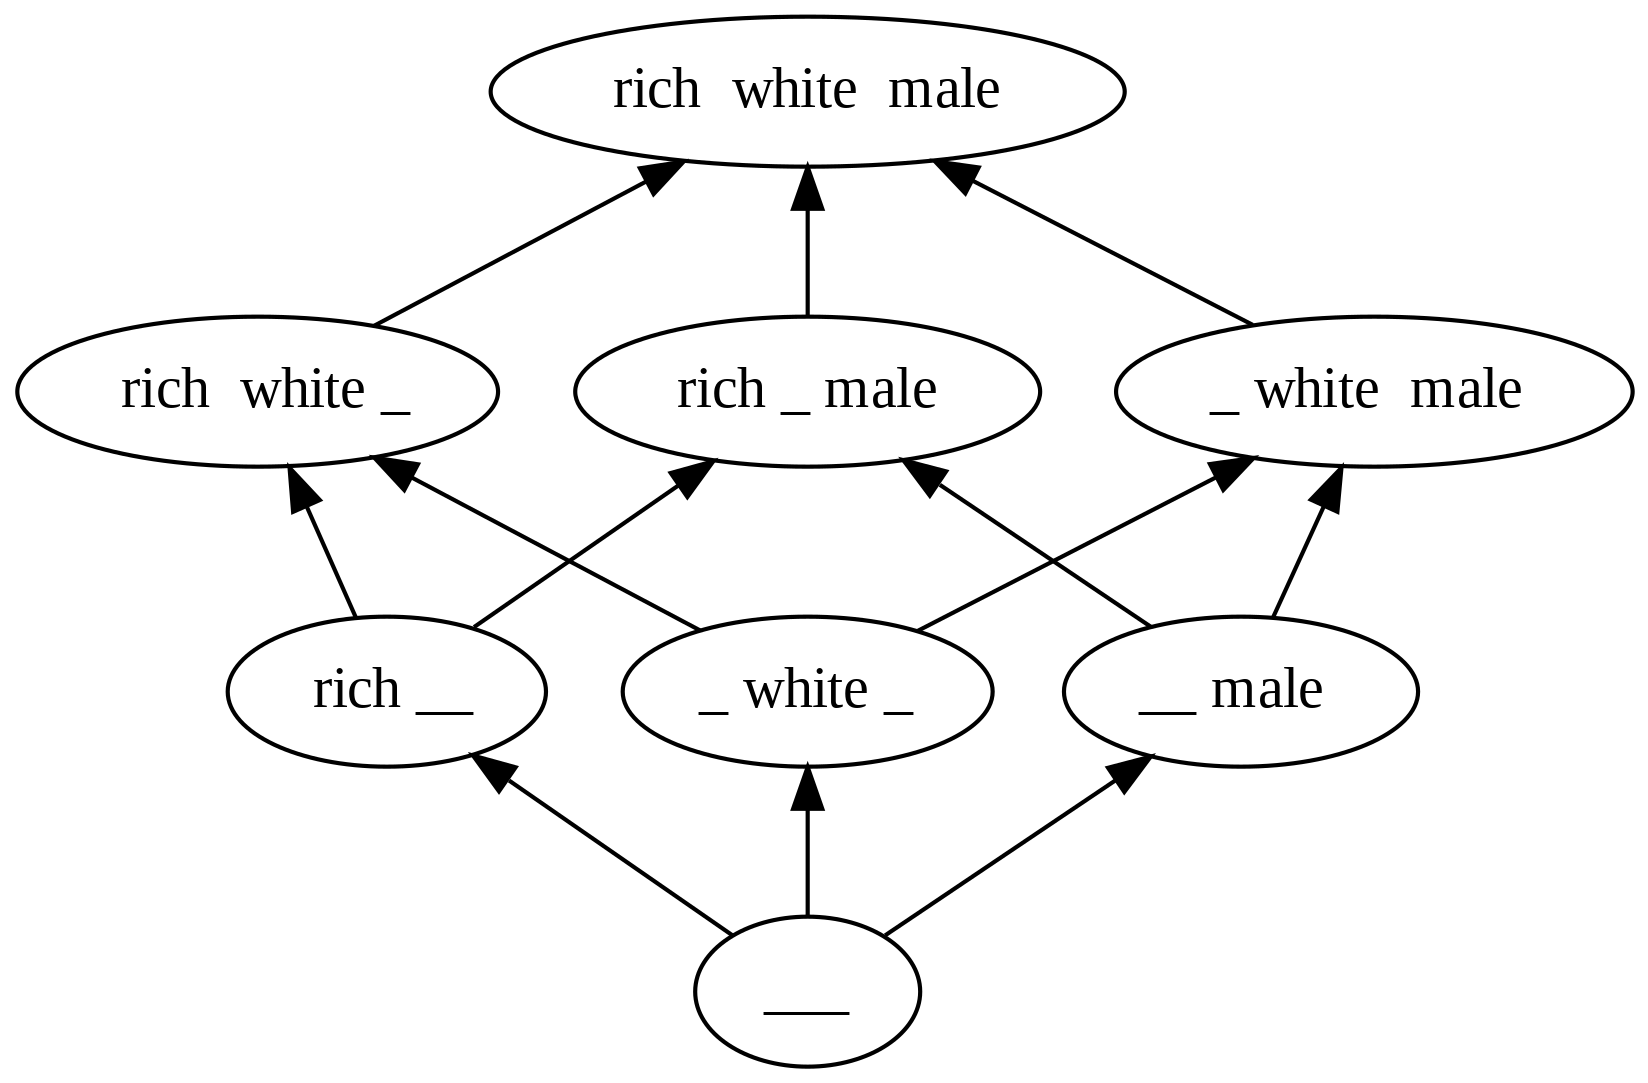

In [ ]:
c = Concept(concept_form='triples')
c.autoAddNodes([' rich ',' white ',' male '])
visualize_dot(c.get_dot())

In [ ]:
print(c.get_dot())

graph viz {
dpi=300;
rankdir=BT;
___ -- " rich __"  [dir=forward];
___ -- "_ white _"  [dir=forward];
___ -- "__ male "  [dir=forward];
" rich __" -- " rich  white _"  [dir=forward];
" rich __" -- " rich _ male "  [dir=forward];
"_ white _" -- " rich  white _"  [dir=forward];
"_ white _" -- "_ white  male "  [dir=forward];
"__ male " -- " rich _ male "  [dir=forward];
"__ male " -- "_ white  male "  [dir=forward];
" rich  white _" -- " rich  white  male "  [dir=forward];
" rich _ male " -- " rich  white  male "  [dir=forward];
"_ white  male " -- " rich  white  male "  [dir=forward]
}



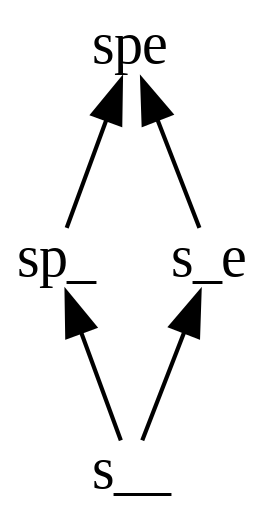

In [ ]:
e = Concept(concept_form='triples')
e.addNode(Node('s__'))
e.addNode(Node('sp_'))
e.addNode(Node('s_e'))
e.addNode(Node('spe'))
visualize_dot(e.get_dot())

# 🖌️ Try it out!

You can add new cells using the `+ Code` button in the top left corner.

**References**:

Spivak, David I. 2014. Category Theory for the Sciences. Cambridge, Massachusetts: The MIT Press.

